In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [337]:
#load csv into DataFrame
Data=pd.read_csv(r"C:\Users\Ashish\Desktop\Datasets\happiness_score_dataset.csv")

### Exploratory Data Analysis

In [338]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [339]:
# #Change O/P column position
# data=pd.DataFrame(data)
# target_variable=data.pop("Happiness Score")
# data.insert(9,'Happiness Score',target_variable)

In [340]:
#for convert the object we use encoder for column "country" and "region"
country_encod=LabelEncoder()
#Encode the region from object to int
re_data=country_encod.fit_transform(data['Region'])
Region=pd.Series(re_data)
#assign encoded data to its origional column in original data set
Data['Region']=Region

### remove unwanted column

In [341]:
#Country column is an nominal value which not even repetaed .it is playing role of identity
Data=Data.drop(columns = ['Country'])

In [342]:
Data=Data.drop(columns = ['Region'])

In [343]:
Data=Data.drop(columns = ['Happiness Rank'])

WE have to convert Object Dtype which is reagion into int DType which help us to understand region column in better way .
it is a repeted value. when we predict the Happyness Score for any other county at same time if we specifically enter region of county 
we may get better or accurate result for that .regionis is an categorical(nominal variable) but this are unordered.

In [344]:
#Change O/P column position
df=pd.DataFrame(Data)
target_variable=Data.pop('Happiness Score')

In [345]:
Data.insert(8,'Happiness Score',target_variable)

### Describe the data

In [346]:
Data.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


In [348]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
Happiness Score                  158 non-null float64
dtypes: float64(9)
memory usage: 11.2 KB


#### Analyze data by using dist. plot

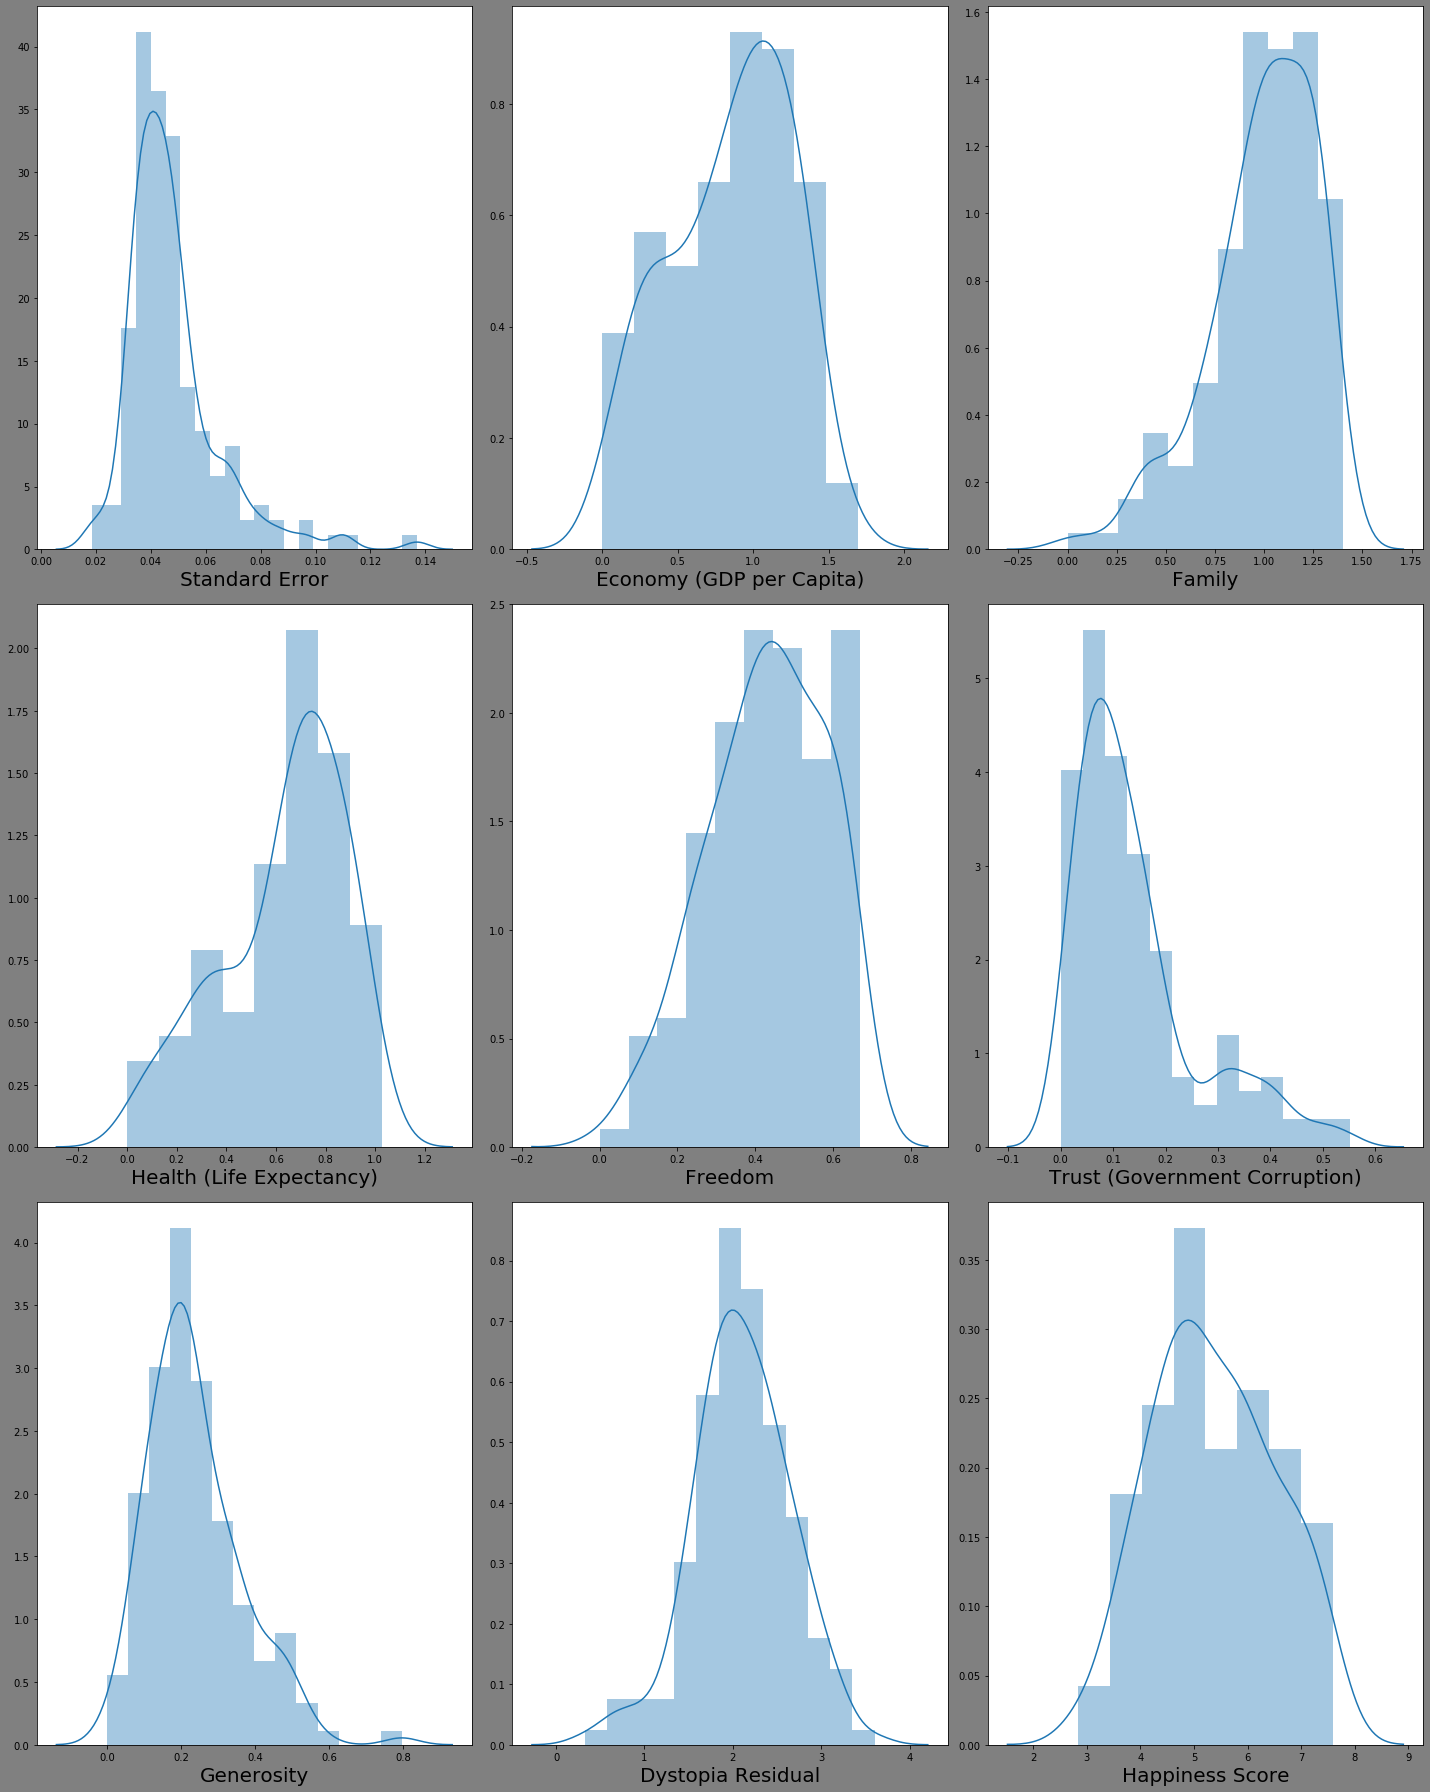

In [349]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in Data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(Data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Skewness:

In [350]:
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats

In [351]:
Data.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

In [352]:
SE=stats.boxcox(Data['Standard Error'])[0]
pd.Series(SE).skew()

-0.04802971494115297

In [353]:
T=np.sqrt(Data['Trust (Government Corruption)'])
T.skew()

0.5076631719436371

In [354]:
G=np.sqrt(Data['Generosity'])
G.skew()

-0.13096114407238377

In [355]:
Data['Standard Error']=SE
Data['Trust (Government Corruption)']=T
Data['Generosity']=G

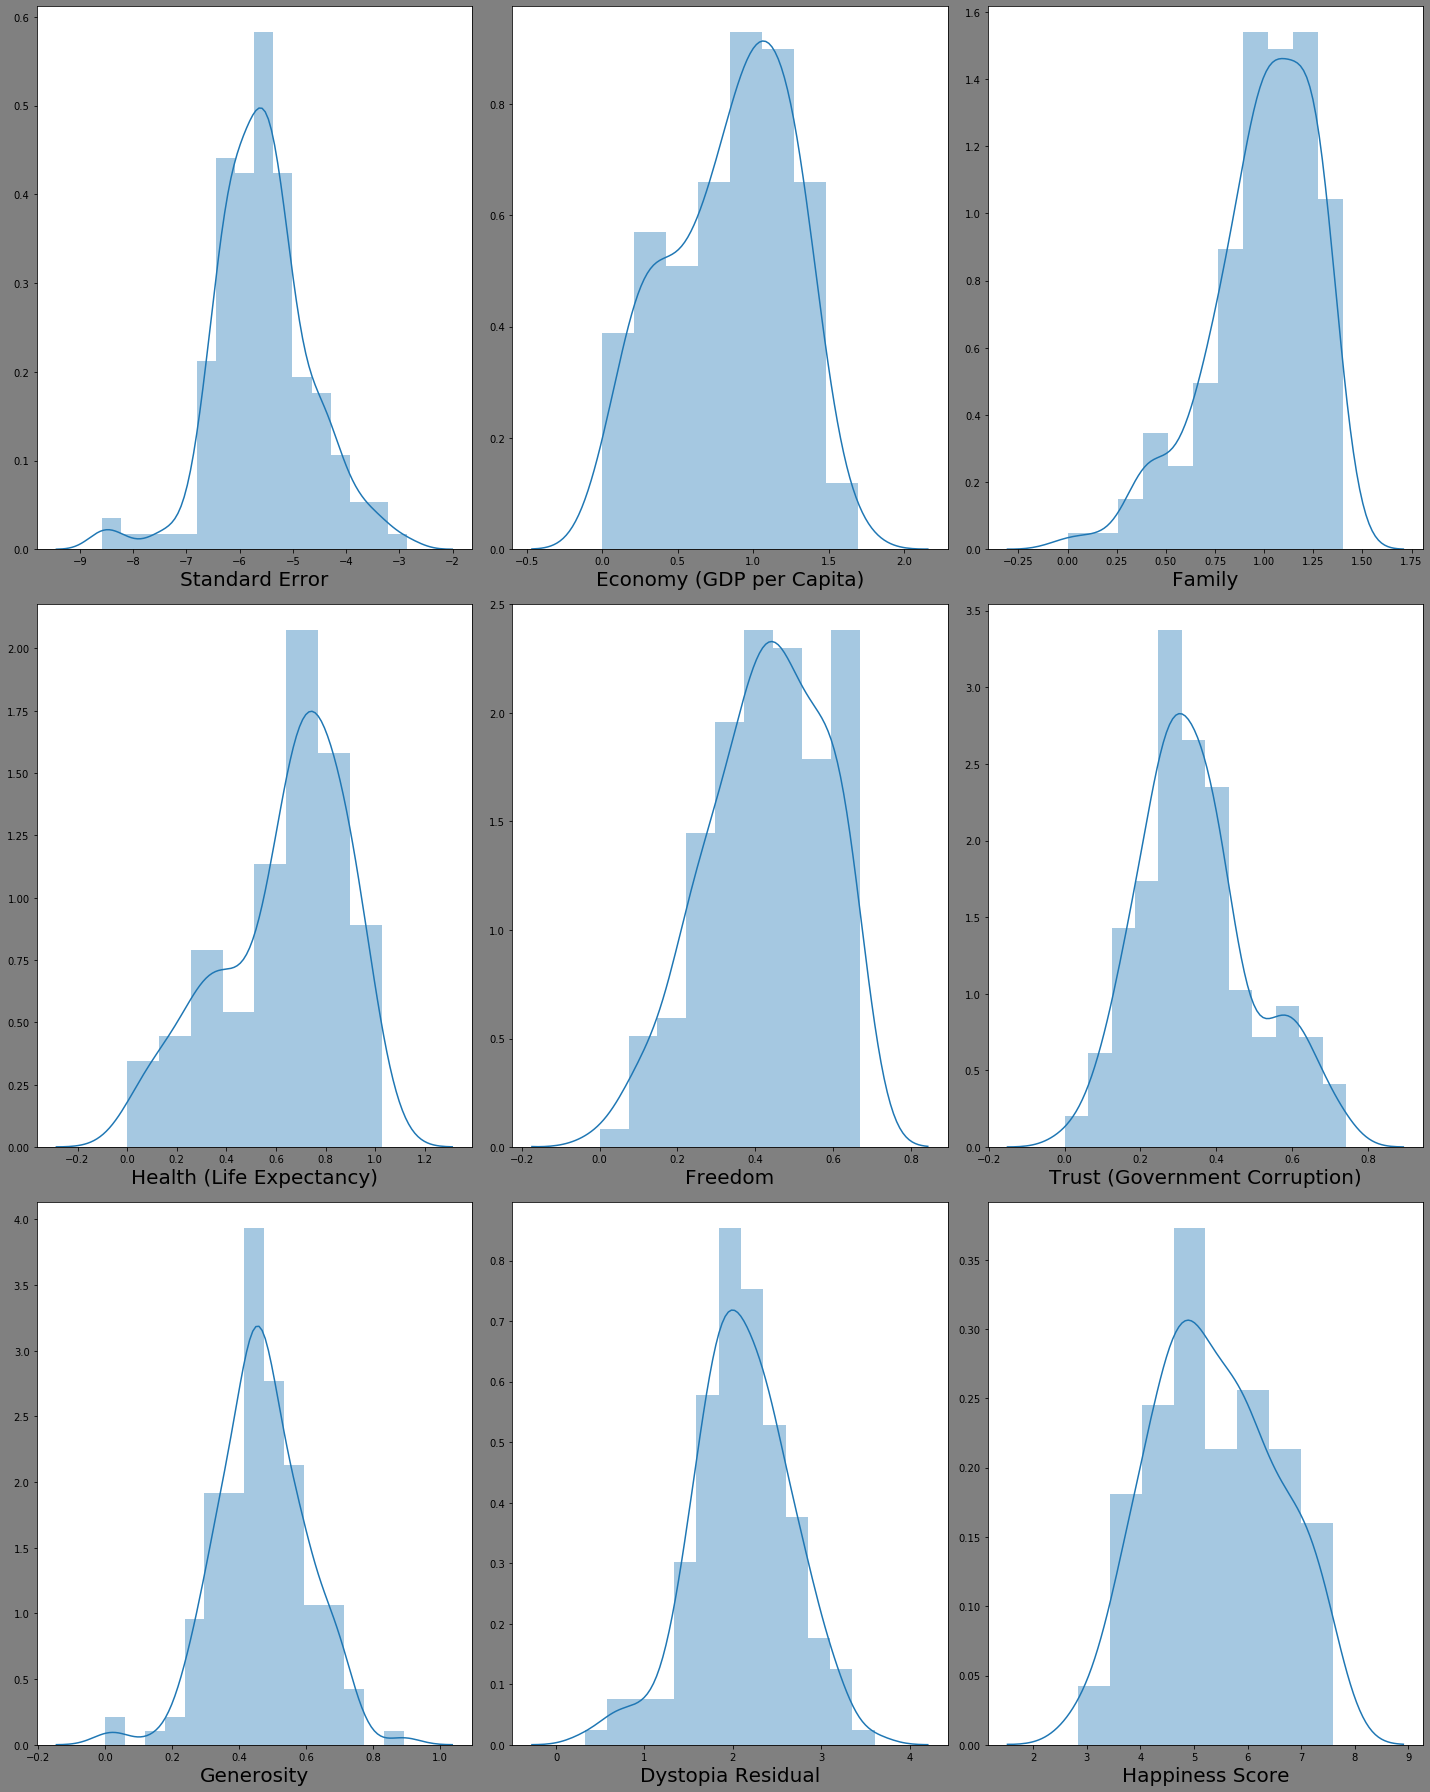

In [356]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in Data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(Data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [357]:
from sklearn.preprocessing import QuantileTransformer

In [358]:
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(Data['Family'])

In [359]:
#Devide dataset into feature and label
Y=Data['Happiness Score']
X=Data.drop(columns=['Happiness Score'])

### Find relation between dependant and independent variable

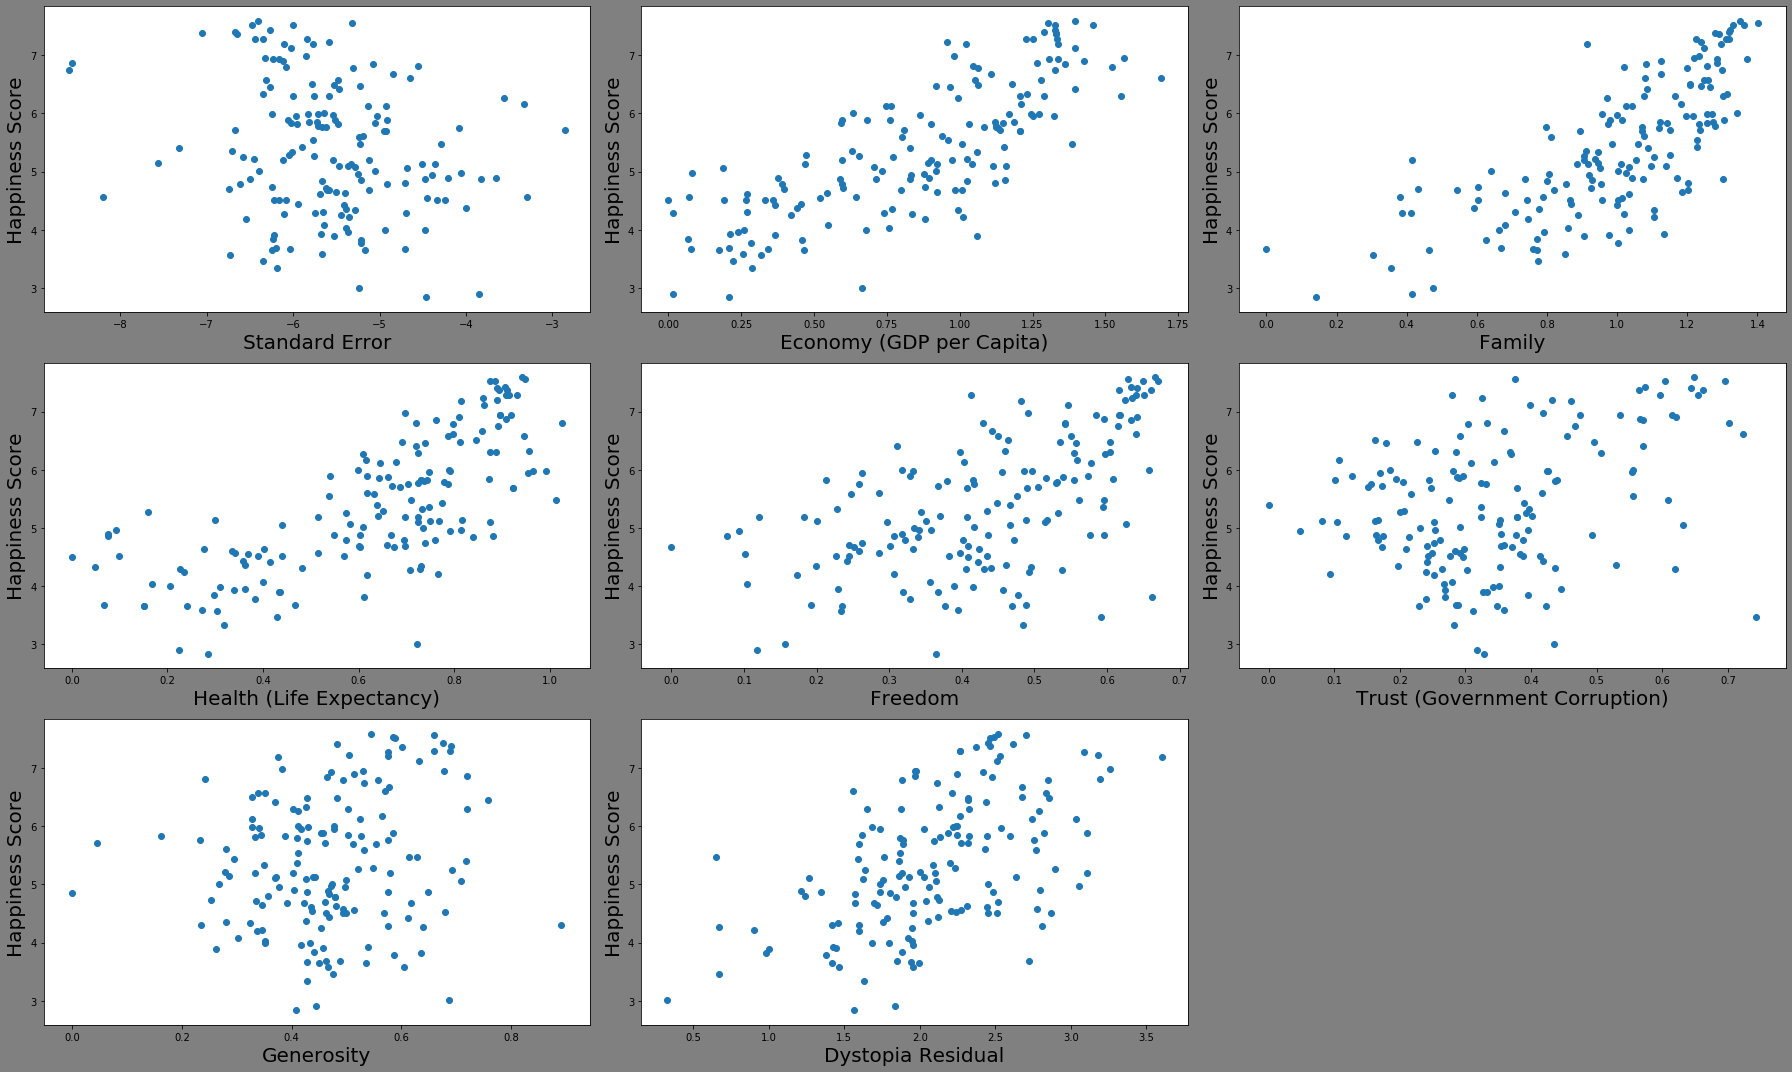

In [360]:
#visualizing relation ship
plt.figure(figsize=(25,15),facecolor="grey")
plotnumber=1

for column in X:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()    

### Bring All data (Labels & Features) in similar Scale

In [362]:
#Data Scaling. Formula which we used Z=(X-mean)/std

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sc=StandardScaler()
X_Scaled=sc.fit_transform(X)
X_Scaled

array([[-0.92076015,  1.36962124,  1.32028142, ...,  1.99453385,
         0.57205491,  0.75825809],
       [ 0.28363352,  1.13522625,  1.51445776, ...,  0.19008801,
         1.44080569,  1.09285682],
       [-1.00901554,  1.19286069,  1.36105403, ...,  2.30979156,
         0.86858624,  0.71233526],
       ...,
       [ 0.3666731 , -0.45524543, -1.90108634, ...,  0.57986048,
         1.63848687, -3.20843049],
       [ 1.92084725, -2.06756644, -2.1184666 , ..., -0.20087891,
        -0.18313939, -0.48198451],
       [ 1.23889708, -1.58633379, -3.13472485, ..., -0.13199882,
        -0.45127425, -0.96361241]])

### Model Instantiating and Training

In [391]:
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,Y,test_size=0.21,random_state=50)

In [392]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [393]:
print('happiness score :',regression.predict(sc.transform([[0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738]])))

happiness score : [7.15765917]


### Find the accuracy of prediction

In [394]:
#Adjusted R2 Score
regression.score(x_train,y_train)

0.9988309136199811

### Lets check how well model fits the test data

In [395]:
regression.score(x_test,y_test)

0.9977733060670091

### Let’s Plot and Visualize

In [396]:
y_pred=regression.predict(x_test)

Text(0.5, 1.0, 'Actual vs Predicted')

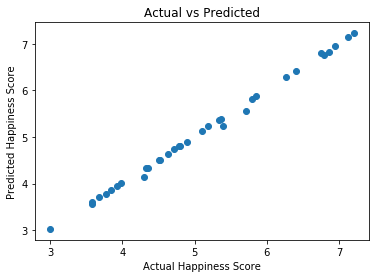

In [397]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title("Actual vs Predicted")

### Evalution of model

In [398]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [399]:
y_pred=regression.predict(x_test)

In [400]:
mean_absolute_error(y_test,y_pred)

0.03319771197914759

In [401]:
mean_squared_error(y_test,y_pred)

0.0029687577636019857

In [402]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05448630803790972